In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import os
import pandas as pd
%matplotlib inline

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [22]:
X_temp = np.array(train[[str(i) for i in range(784)]][60:80])
X_temp = X_temp.reshape(-1,1,28,28)
X_temp.shape

(20, 1, 28, 28)

In [23]:
train_digit = train['digit'].values
X_train_letter = train['letter'].values
X_test_letter = test['letter'].values

In [24]:
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

In [25]:
def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

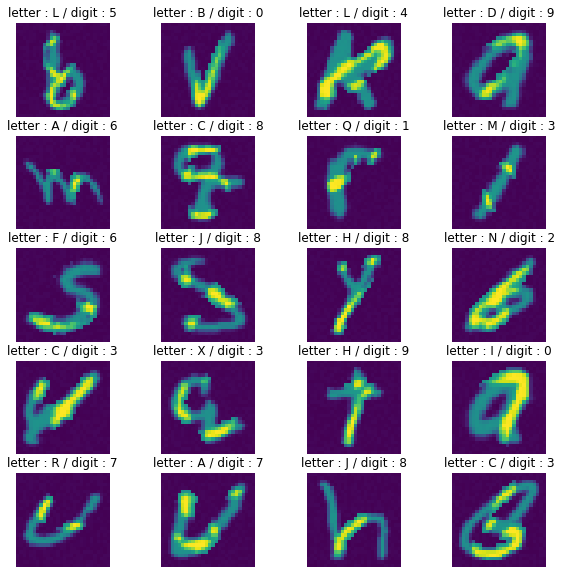

In [30]:
plt.figure(figsize=(10,10))
for idx, (image, digit, letter) in enumerate(zip(X_temp[:20], train_digit[:20] ,X_train_letter[:20])):
    plt.subplot(5,4,idx+1)
    plt.imshow(image[0])
    title = 'letter : {} / digit : {}'.format(letter, digit)
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

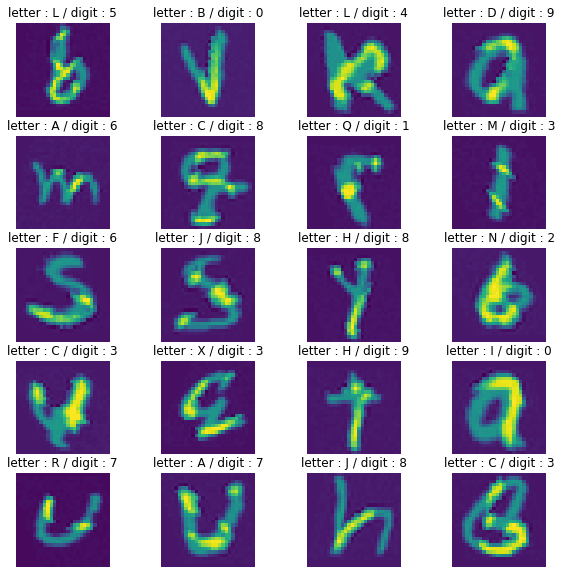

In [31]:
plt.figure(figsize=(10,10))
for idx, (image, digit, letter) in enumerate(zip(X_temp[:20], train_digit[:20] ,X_train_letter[:20])):
    plt.subplot(5,4,idx+1)
    newim = deskew(image[0])
    plt.imshow(newim)
    title = 'letter : {} / digit : {}'.format(letter, digit)
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')